In [2]:
import cv2

In [4]:
cv2.imread()

TypeError: imread() missing required argument 'filename' (pos 1)

In [87]:
import cv2
from os.path import join
from IPython.display import display
from PIL import Image

from scipy import ndimage

In [88]:
from matplotlib import pyplot as plt

In [89]:
DATA_DIR = '/Users/seanwade/projects/cancerDetection/data/SIPaKMeD/im_Metaplastic'

In [90]:
img1 = cv2.imread(join(DATA_DIR, '001.bmp'), )
img2 = cv2.imread(join(DATA_DIR, '002.bmp'))

In [82]:
img1.shape

(1536, 2048, 3)

In [57]:
def show_image(img):
    display(Image.fromarray(img))
    
def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

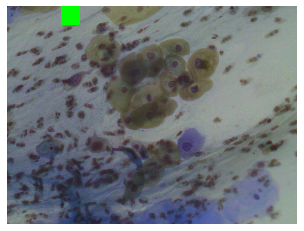

In [61]:
show_image(img1)

## Rotate

In [85]:
img = ndimage.rotate(img1, 50, reshape=False)

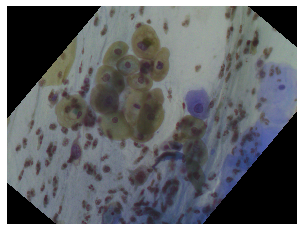

In [86]:
show_image(img)

## Flip

In [83]:
img = cv2.flip(img1, 60)

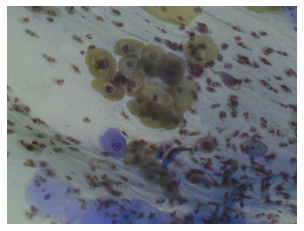

In [84]:
show_image(img)

## Overlay

In [30]:
import numpy as np

In [38]:
h, w, _ = img1.shape
mask = np.zeros((h,w,3), np.uint8)

In [39]:
mask = cv2.rectangle(mask,(384,200),(510,128),(255,255,255),-1)

In [41]:
def overlay_image_alpha(img, img_overlay, pos, alpha_mask):
    """Overlay img_overlay on top of img at the position specified by
    pos and blend using alpha_mask.

    Alpha mask must contain values within the range [0, 1] and be the
    same size as img_overlay.
    """

    x, y = pos

    # Image ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return

    channels = img.shape[2]

    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha

    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] +
                                alpha_inv * img[y1:y2, x1:x2, c])

In [43]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2RGBA).copy()
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2RGBA).copy()

overlay_image_alpha(img1, mask, (0,0), mask)

ValueError: operands could not be broadcast together with shapes (1536,2048,4) (1536,2048) 

In [44]:
img1

array([[[ 58,  85, 106, 255],
        [ 58,  85, 106, 255],
        [ 59,  86, 109, 255],
        ...,
        [118, 157, 146, 255],
        [117, 156, 147, 255],
        [120, 150, 151, 255]],

       [[ 66,  80,  96, 255],
        [ 73,  70, 103, 255],
        [ 74,  69, 100, 255],
        ...,
        [132, 142, 145, 255],
        [125, 145, 146, 255],
        [123, 150, 141, 255]],

       [[ 63,  75,  87, 255],
        [ 69,  70,  91, 255],
        [ 69,  65,  93, 255],
        ...,
        [133, 143, 139, 255],
        [131, 144, 138, 255],
        [127, 148, 134, 255]],

       ...,

       [[103,  90,  98, 255],
        [108,  89,  98, 255],
        [109,  91,  95, 255],
        ...,
        [156, 164, 148, 255],
        [153, 164, 150, 255],
        [152, 163, 154, 255]],

       [[110,  83,  97, 255],
        [111,  90,  92, 255],
        [110,  86,  91, 255],
        ...,
        [173, 170, 146, 255],
        [170, 167, 148, 255],
        [168, 173, 147, 255]],

       [[110

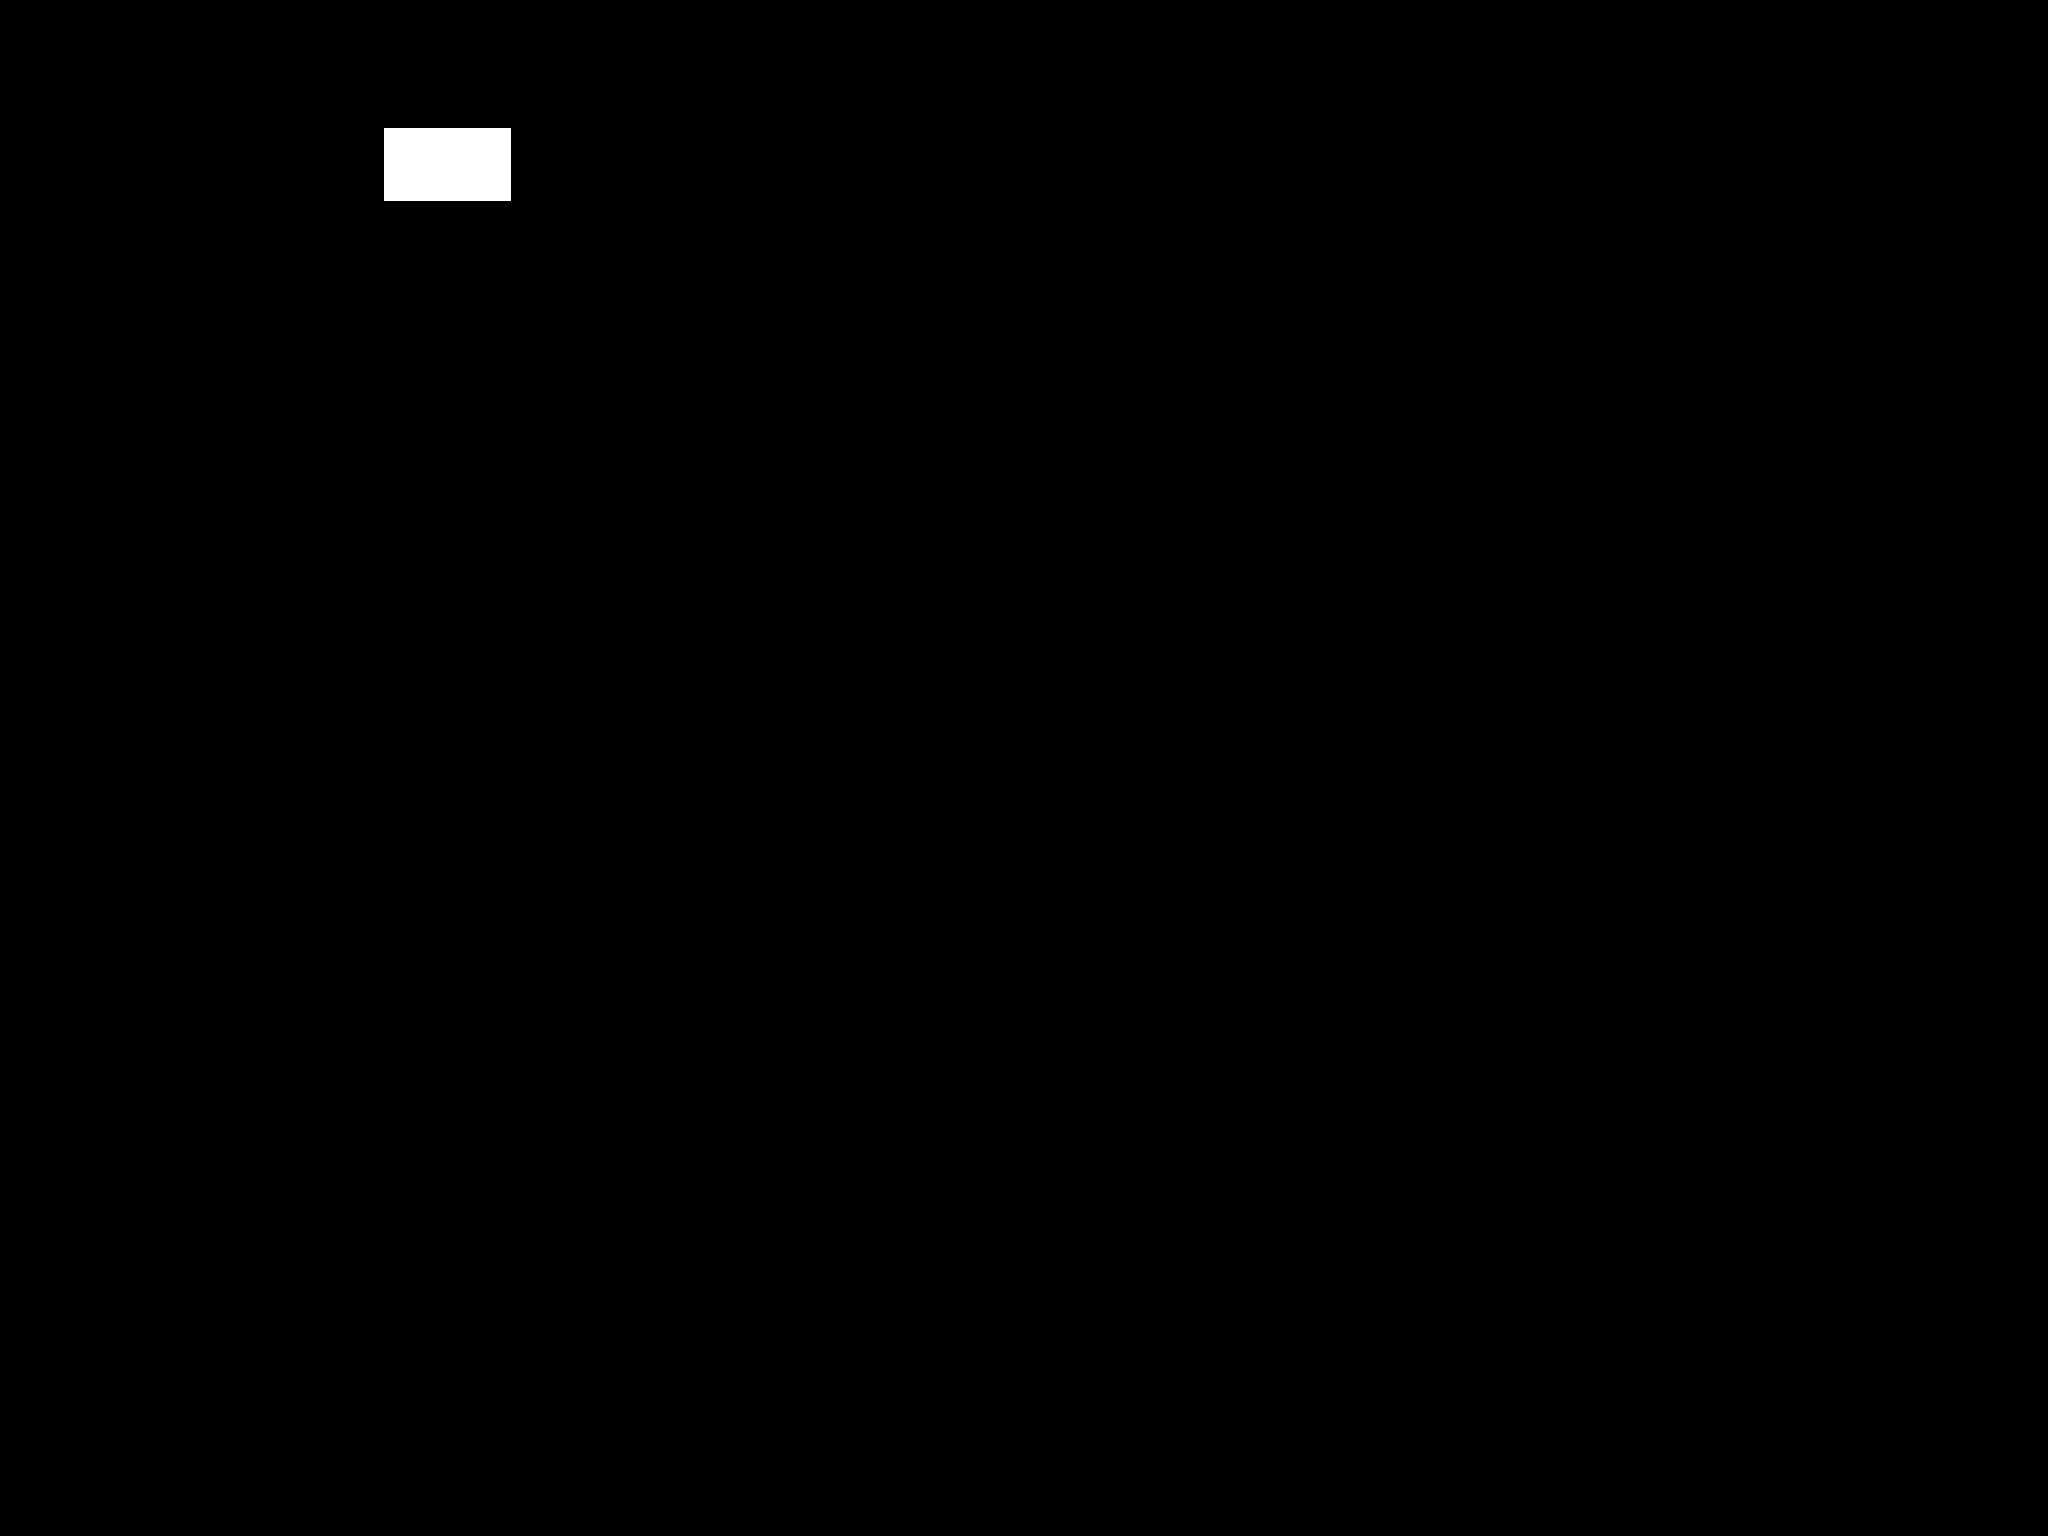

In [40]:
show_image(mask)

In [25]:
s_img = cv2.imread("smaller_image.png", -1)

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    alpha = s_img[oy:oy+height, ox:ox+width, 3] / 255.0
    color = s_img[oy:oy+height, ox:ox+width, c] * (1.0-alpha)
    beta  = l_img[by:by+height, bx:bx+width, c] * (alpha)

    l_img[by:by+height, bx:bx+width, c] = color + beta

NameError: name 'y_offset' is not defined

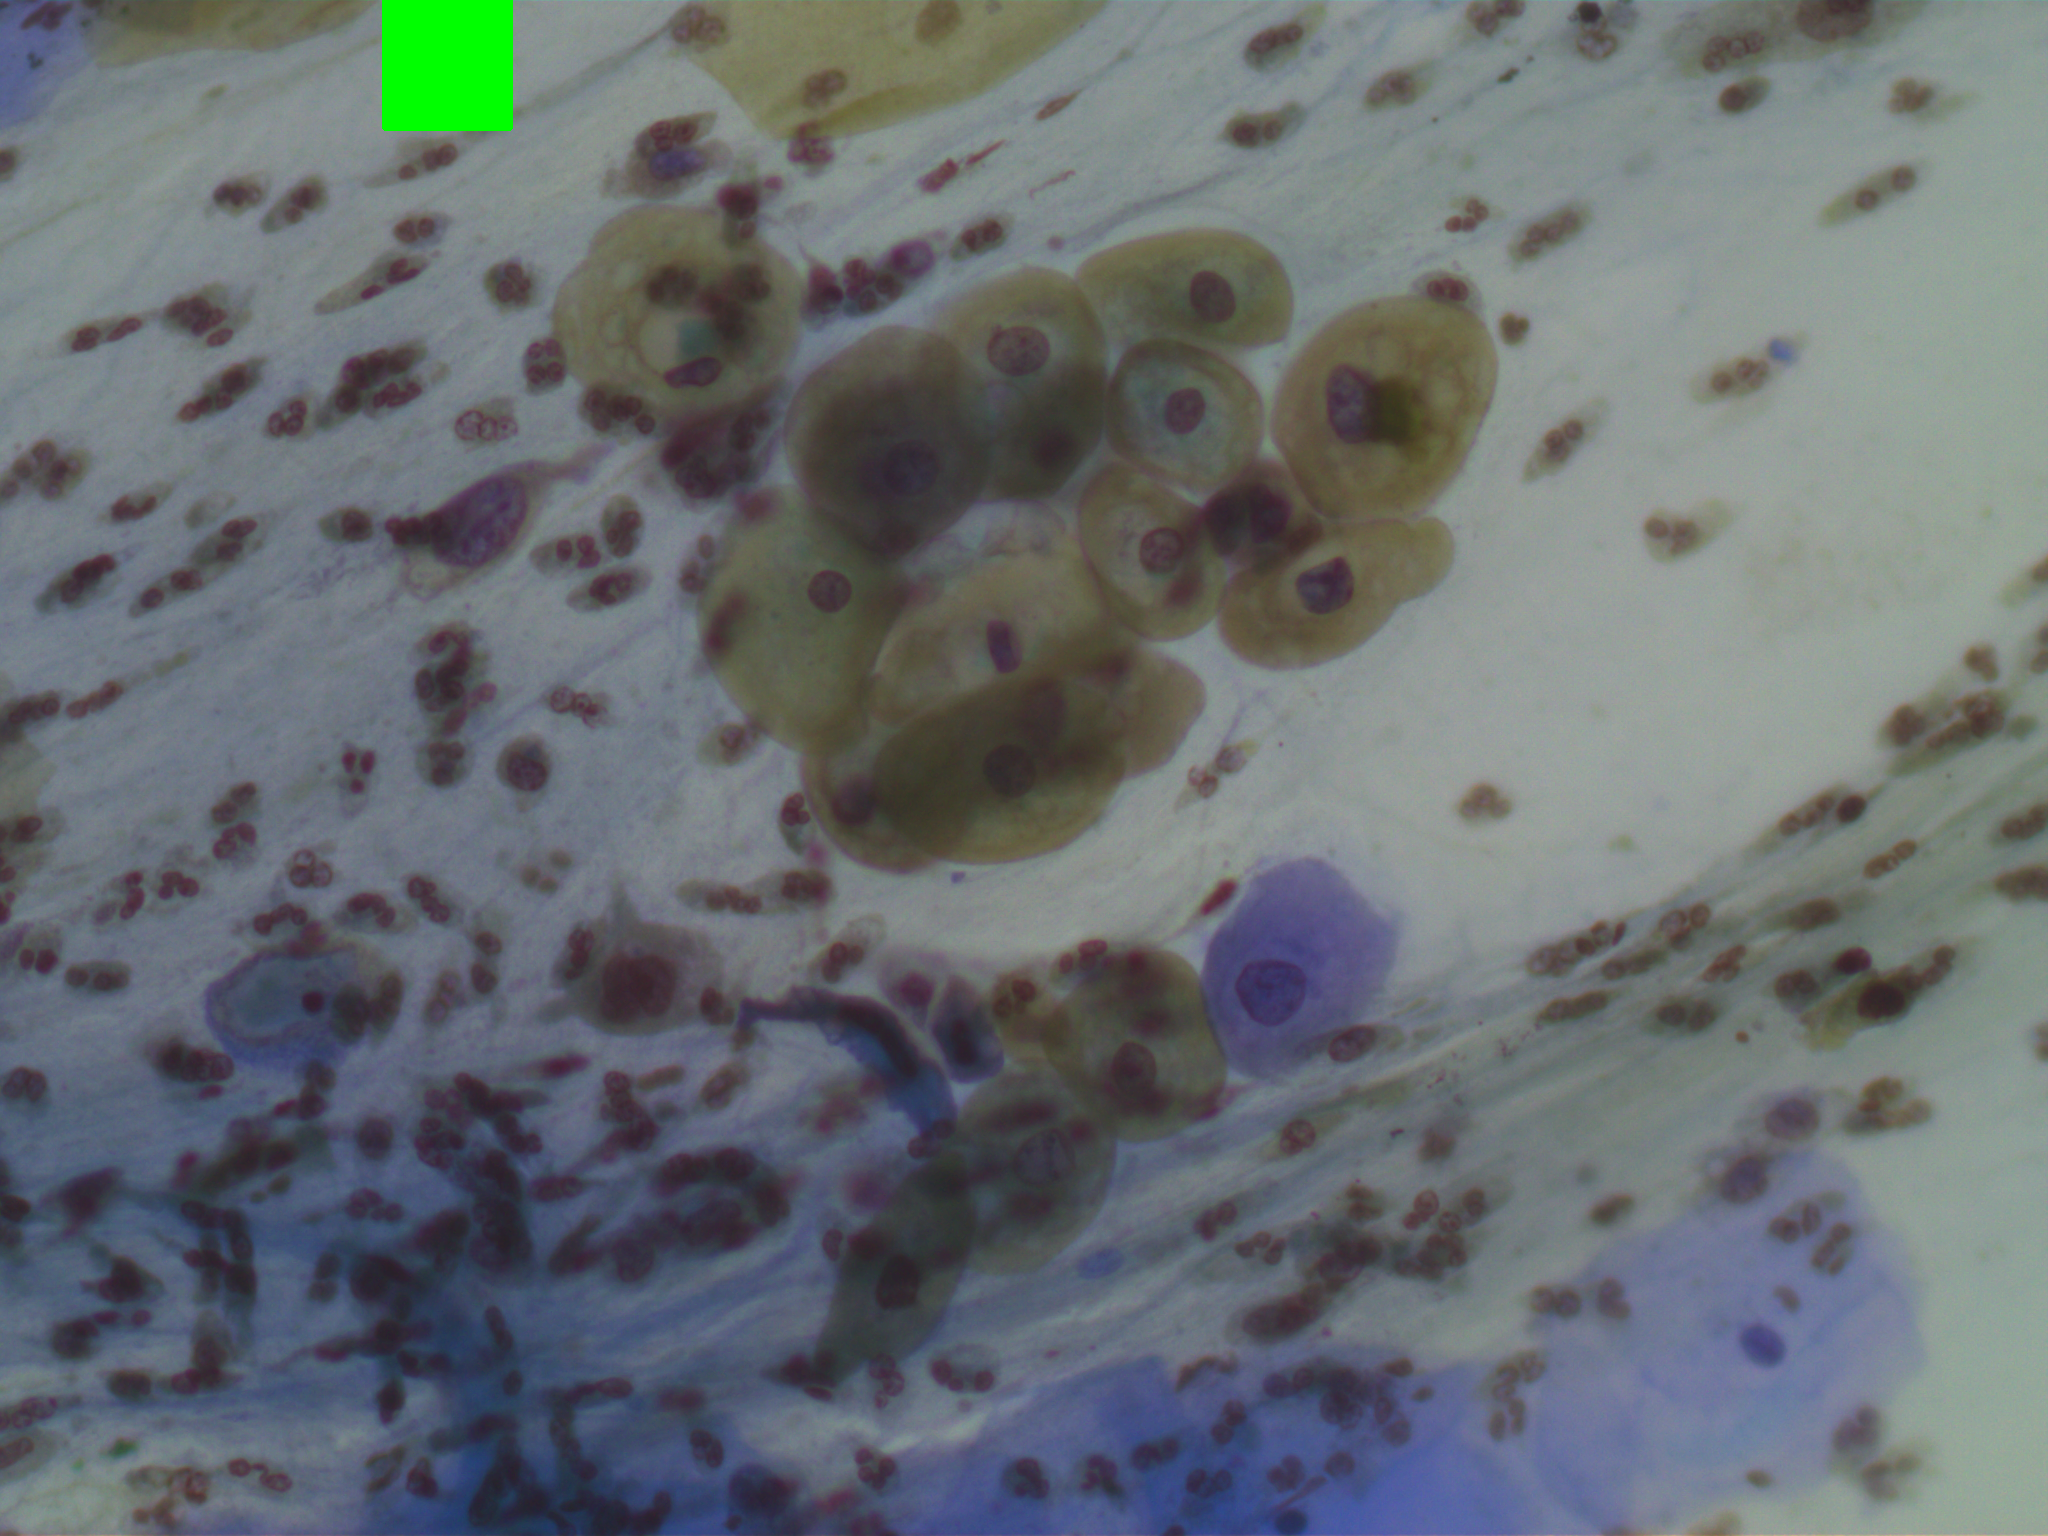

In [24]:
show_image(cv2.rectangle(img1,(384,0),(510,128),(0,255,0, .1),-1))